# HW5
#### Henry C. Wong

In [108]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
import seaborn as sns

In [76]:
def kFoldCV(df,k):
    splitBy = int(len(df.index)/k)
    train = []
    dfc = df.copy()
    dfc = shuffle(dfc)  # need to randomize
    for i in range(k-1):
        dropped = dfc.iloc[:splitBy]
        dfc = dfc.drop(dfc.head(splitBy).index)
        train.append(dropped)
    return(train,dfc)

In [77]:
def encode_target(df, target_column):
    """Add column to df with integers for the target.

    Args
    ----
    df -- pandas Data Frame.
    target_column -- column to map to int, producing new
                     Target column.

    Returns
    -------
    df -- modified Data Frame.
    targets -- list of target names.
    """
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

### Decision Tree

In [78]:
df = pd.read_csv("iris.csv")

In [79]:
features = ["SepalLength", "SepalWidth",
            "PetalLength", "PetalWidth"]
df,targets = encode_target(df,"Name")
train,test = kFoldCV(df,5)

In [80]:
clf = DecisionTreeClassifier()
scores = []
f1Scores = []
for x in train:
  X = x[features]
  y = x["Target"]
  clf.fit(X,y)
  score = clf.score(test[features],test["Target"])
  f1Score = f1_score(test["Target"],clf.predict(test[features]),average="weighted")
  scores.append(score)
  f1Scores.append(f1Score)

In [81]:
averageScore = sum(scores) / len(scores)
averageF1 = sum(f1Scores) / len(f1Scores)

In [82]:
print("Average Score:", averageScore)
print("Average F1-Score:", averageF1)

Average Score: 0.9750000000000001
Average F1-Score: 0.9749242424242425


### KNN

In [64]:
scoresKNN = []
bestKNNScore = 0
f1KNNScores = []

In [65]:
for x in train:
  neigh = KNeighborsClassifier()
  X = x[features]
  y = x["Target"]
  neigh.fit(X,y)
  scoreKNN = neigh.score(test[features],test["Target"])
  f1KNNScore = f1_score(test["Target"],neigh.predict(test[features]),average="weighted")
  scoresKNN.append(scoreKNN)
  f1KNNScores.append(f1KNNScore)

In [66]:
averageKNNF1Score = sum(f1KNNScores)/len(f1KNNScores)
averageKNNScore = sum(scoresKNN)/len(scoresKNN)

In [67]:
print("Average KNN Score:", averageKNNScore)
print("Average KNN F1-Score:",averageKNNF1Score)

Average KNN Score: 0.95
Average KNN F1-Score: 0.9499635573796635


## K Impact Evaluation

### Decision Tree

In [120]:
decisionAverageScores = []
decisionF1Scores = []

In [121]:
for i in range(10):
    df,targets = encode_target(df,"Name")
    train,test = kFoldCV(df,i+2)
    clf = DecisionTreeClassifier()
    scores = []
    f1Scores = []
    for x in train:
      X = x[features]
      y = x["Target"]
      clf.fit(X,y)
      score = clf.score(test[features],test["Target"])
      f1Score = f1_score(test["Target"],clf.predict(test[features]),average="weighted")
      scores.append(score)
      f1Scores.append(f1Score)
    averageScore = sum(scores) / len(scores)
    averageF1 = sum(f1Scores) / len(f1Scores)
    decisionAverageScores.append(averageScore)
    decisionF1Scores.append(averageF1)

C:\Users\cywon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [122]:
decisionScoresdf = pd.DataFrame({"averageScore":decisionAverageScores})

In [123]:
decisionScoresdf["averageF1Score"] = decisionF1Scores

In [124]:
decisionScoresdf

averageScore  averageF1Score
0      0.920000        0.920726
1      0.960000        0.959965
2      0.923077        0.922615
3      0.908333        0.907104
4      0.944000        0.942959
5      0.986111        0.986280
6      0.904762        0.907639
7      0.869318        0.861086
8      0.822222        0.808225
9      0.870000        0.870855

In [125]:
decisionScoresdf["k"] = [2,3,4,5,6,7,8,9,10,11]

In [126]:
decisionScoresdf.head()

averageScore  averageF1Score  k
0      0.920000        0.920726  2
1      0.960000        0.959965  3
2      0.923077        0.922615  4
3      0.908333        0.907104  5
4      0.944000        0.942959  6

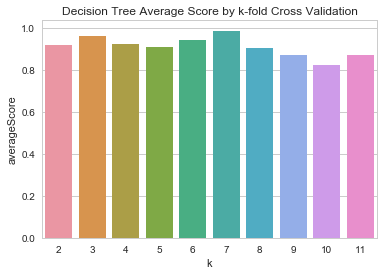

In [149]:
sns.set(style="whitegrid")
ax = sns.barplot(x="k",y="averageScore",data=decisionScoresdf).set_title("Decision Tree Average Score by k-fold Cross Validation")

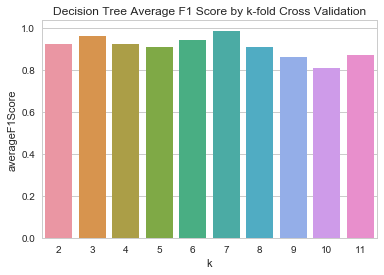

In [148]:
ax = sns.barplot(x="k",y="averageF1Score",data=decisionScoresdf).set_title("Decision Tree Average F1 Score by k-fold Cross Validation")

### KNN

In [128]:
KNNAverageScores = []
KNNF1Scores = []

In [130]:
for i in range(10):
    df,targets = encode_target(df,"Name")
    train,test = kFoldCV(df,i+2)
    scoresKNN = []
    bestKNN = []
    bestKNNScore = 0
    f1KNNScores = []
    for x in train:
      neigh = KNeighborsClassifier()
      X = x[features]
      y = x["Target"]
      neigh.fit(X,y)
      scoreKNN = neigh.score(test[features],test["Target"])
      f1KNNScore = f1_score(test["Target"],neigh.predict(test[features]),average="weighted")
      scoresKNN.append(scoreKNN)
      f1KNNScores.append(f1KNNScore)
    KNNAverageScores.append(scoreKNN)
    KNNF1Scores.append(f1KNNScore)

C:\Users\cywon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cywon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cywon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cywon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cywon\Anaconda3\lib\site-packages\sklearn\metrics\c

In [139]:
KNNScoresdf = pd.DataFrame({"averageScore":KNNAverageScores})
KNNScoresdf["averageF1Score"] = KNNF1Scores
KNNScoresdf["k"] = [2,3,4,5,6,7,8,9,10,11]

In [140]:
KNNScoresdf.head()

averageScore  averageF1Score  k
0      0.946667        0.946475  2
1      0.920000        0.919405  3
2      0.871795        0.873327  4
3      0.833333        0.841176  5
4      0.960000        0.960281  6

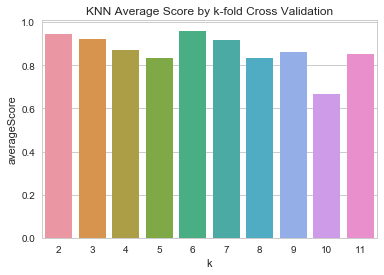

In [150]:
ax = sns.barplot(x="k",y="averageScore",data=KNNScoresdf).set_title("KNN Average Score by k-fold Cross Validation")

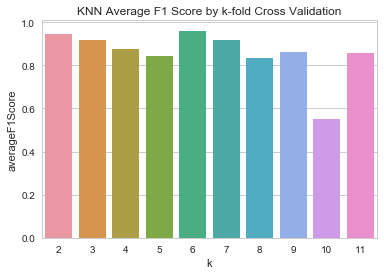

In [151]:
ax = sns.barplot(x="k",y="averageF1Score",data=KNNScoresdf).set_title("KNN Average F1 Score by k-fold Cross Validation")